<a href="https://colab.research.google.com/github/ahamedafzal/Nestle_stock_prediction/blob/main/Nestle_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/drive/MyDrive/Data sets/nestle.csv")
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


**Data analysation**

In [55]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [56]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2548,6-January-2012,4114.0,4160.0,4076.0,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.0,29.25
2549,5-January-2012,4118.0,4126.9,4080.0,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.9,-16.15
2550,4-January-2012,4100.0,4125.0,4081.4,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.6,20.60
2551,3-January-2012,4061.0,4110.1,4060.1,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.0,34.35
2552,2-January-2012,4139.9,4139.9,4044.0,4070.35,4085.640979,7760,1132,31704574.0,5776.0,74.43,95.9,-69.55


In [57]:
df.shape

(2553, 13)

In [58]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


From the description we get to know that ;

Maximum opening price recorded till date is Rs. 20452 and minimum is 3970.

Maximum Closing Price is Rs 20439.45 and Minimum price was Rs 3942.45.

The Maximum Weighted Average Price was Rs 20417.37 and Rs 3936.76 was the minimum

The hiest price recorded till date is Rs 20599.95 and lowest is Rs 3995

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [60]:
df.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.076134,0.155587,0.191480,-0.093000,-0.246738,0.616536,-0.065212
High Price,0.999722,1.000000,0.999610,0.999793,0.999879,-0.073740,0.162156,0.194465,-0.092403,-0.248603,0.627006,-0.047052
Low Price,0.999701,0.999610,1.000000,0.999761,0.999858,-0.078191,0.150214,0.188937,-0.093886,-0.245208,0.604996,-0.047372
Close Price,0.999490,0.999793,0.999761,1.000000,0.999927,-0.075764,0.156813,0.191751,-0.093174,-0.246861,0.616866,-0.033314
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075620,0.156683,0.191979,-0.093045,-0.247219,0.616620,-0.041972
No.of Shares,-0.076134,-0.073740,-0.078191,-0.075764,-0.075620,1.000000,0.452116,0.856353,0.868194,0.279279,0.078676,0.015336
No. of Trades,0.155587,0.162156,0.150214,0.156813,0.156683,0.452116,1.000000,0.464951,0.103851,-0.188500,0.432884,0.030636
Total Turnover (Rs.),0.191480,0.194465,0.188937,0.191751,0.191979,0.856353,0.464951,1.000000,0.655851,0.192031,0.273972,-0.000969
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


<Axes: >

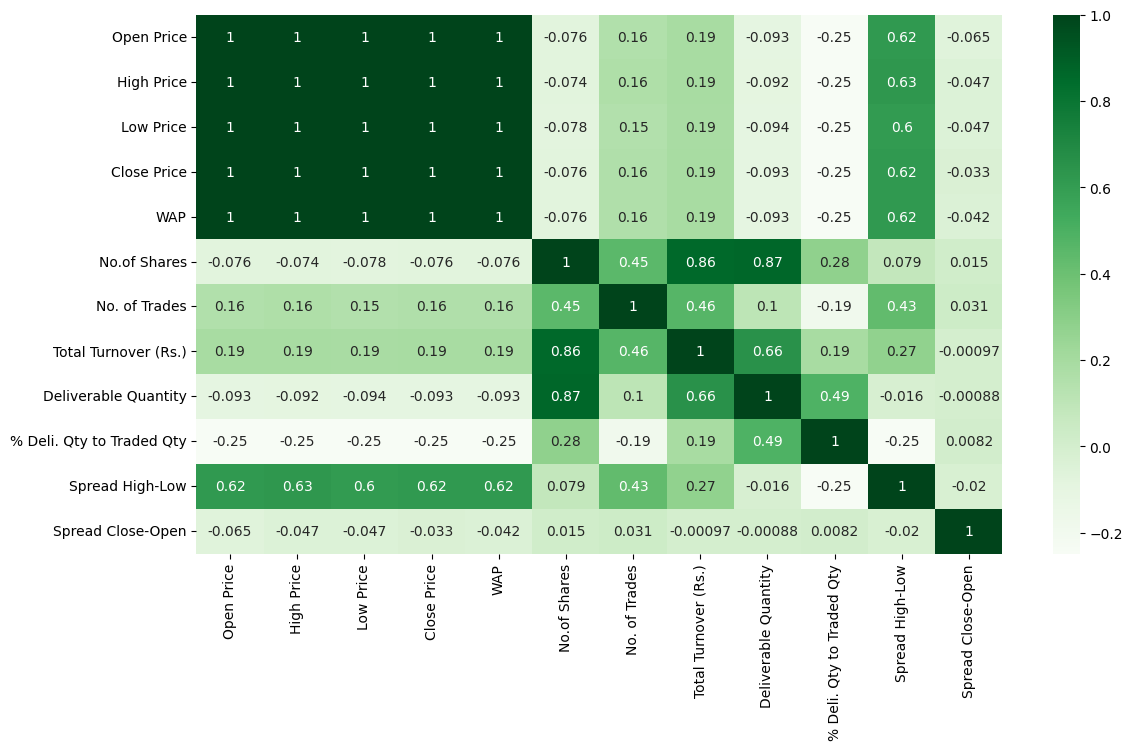

In [61]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='Greens')

Weighted Average Price , Open , High and Low Prices has highest correlation with our Target column i.e. with Close Price. So , we are going to use only these four columns for better accuracy and predictions .

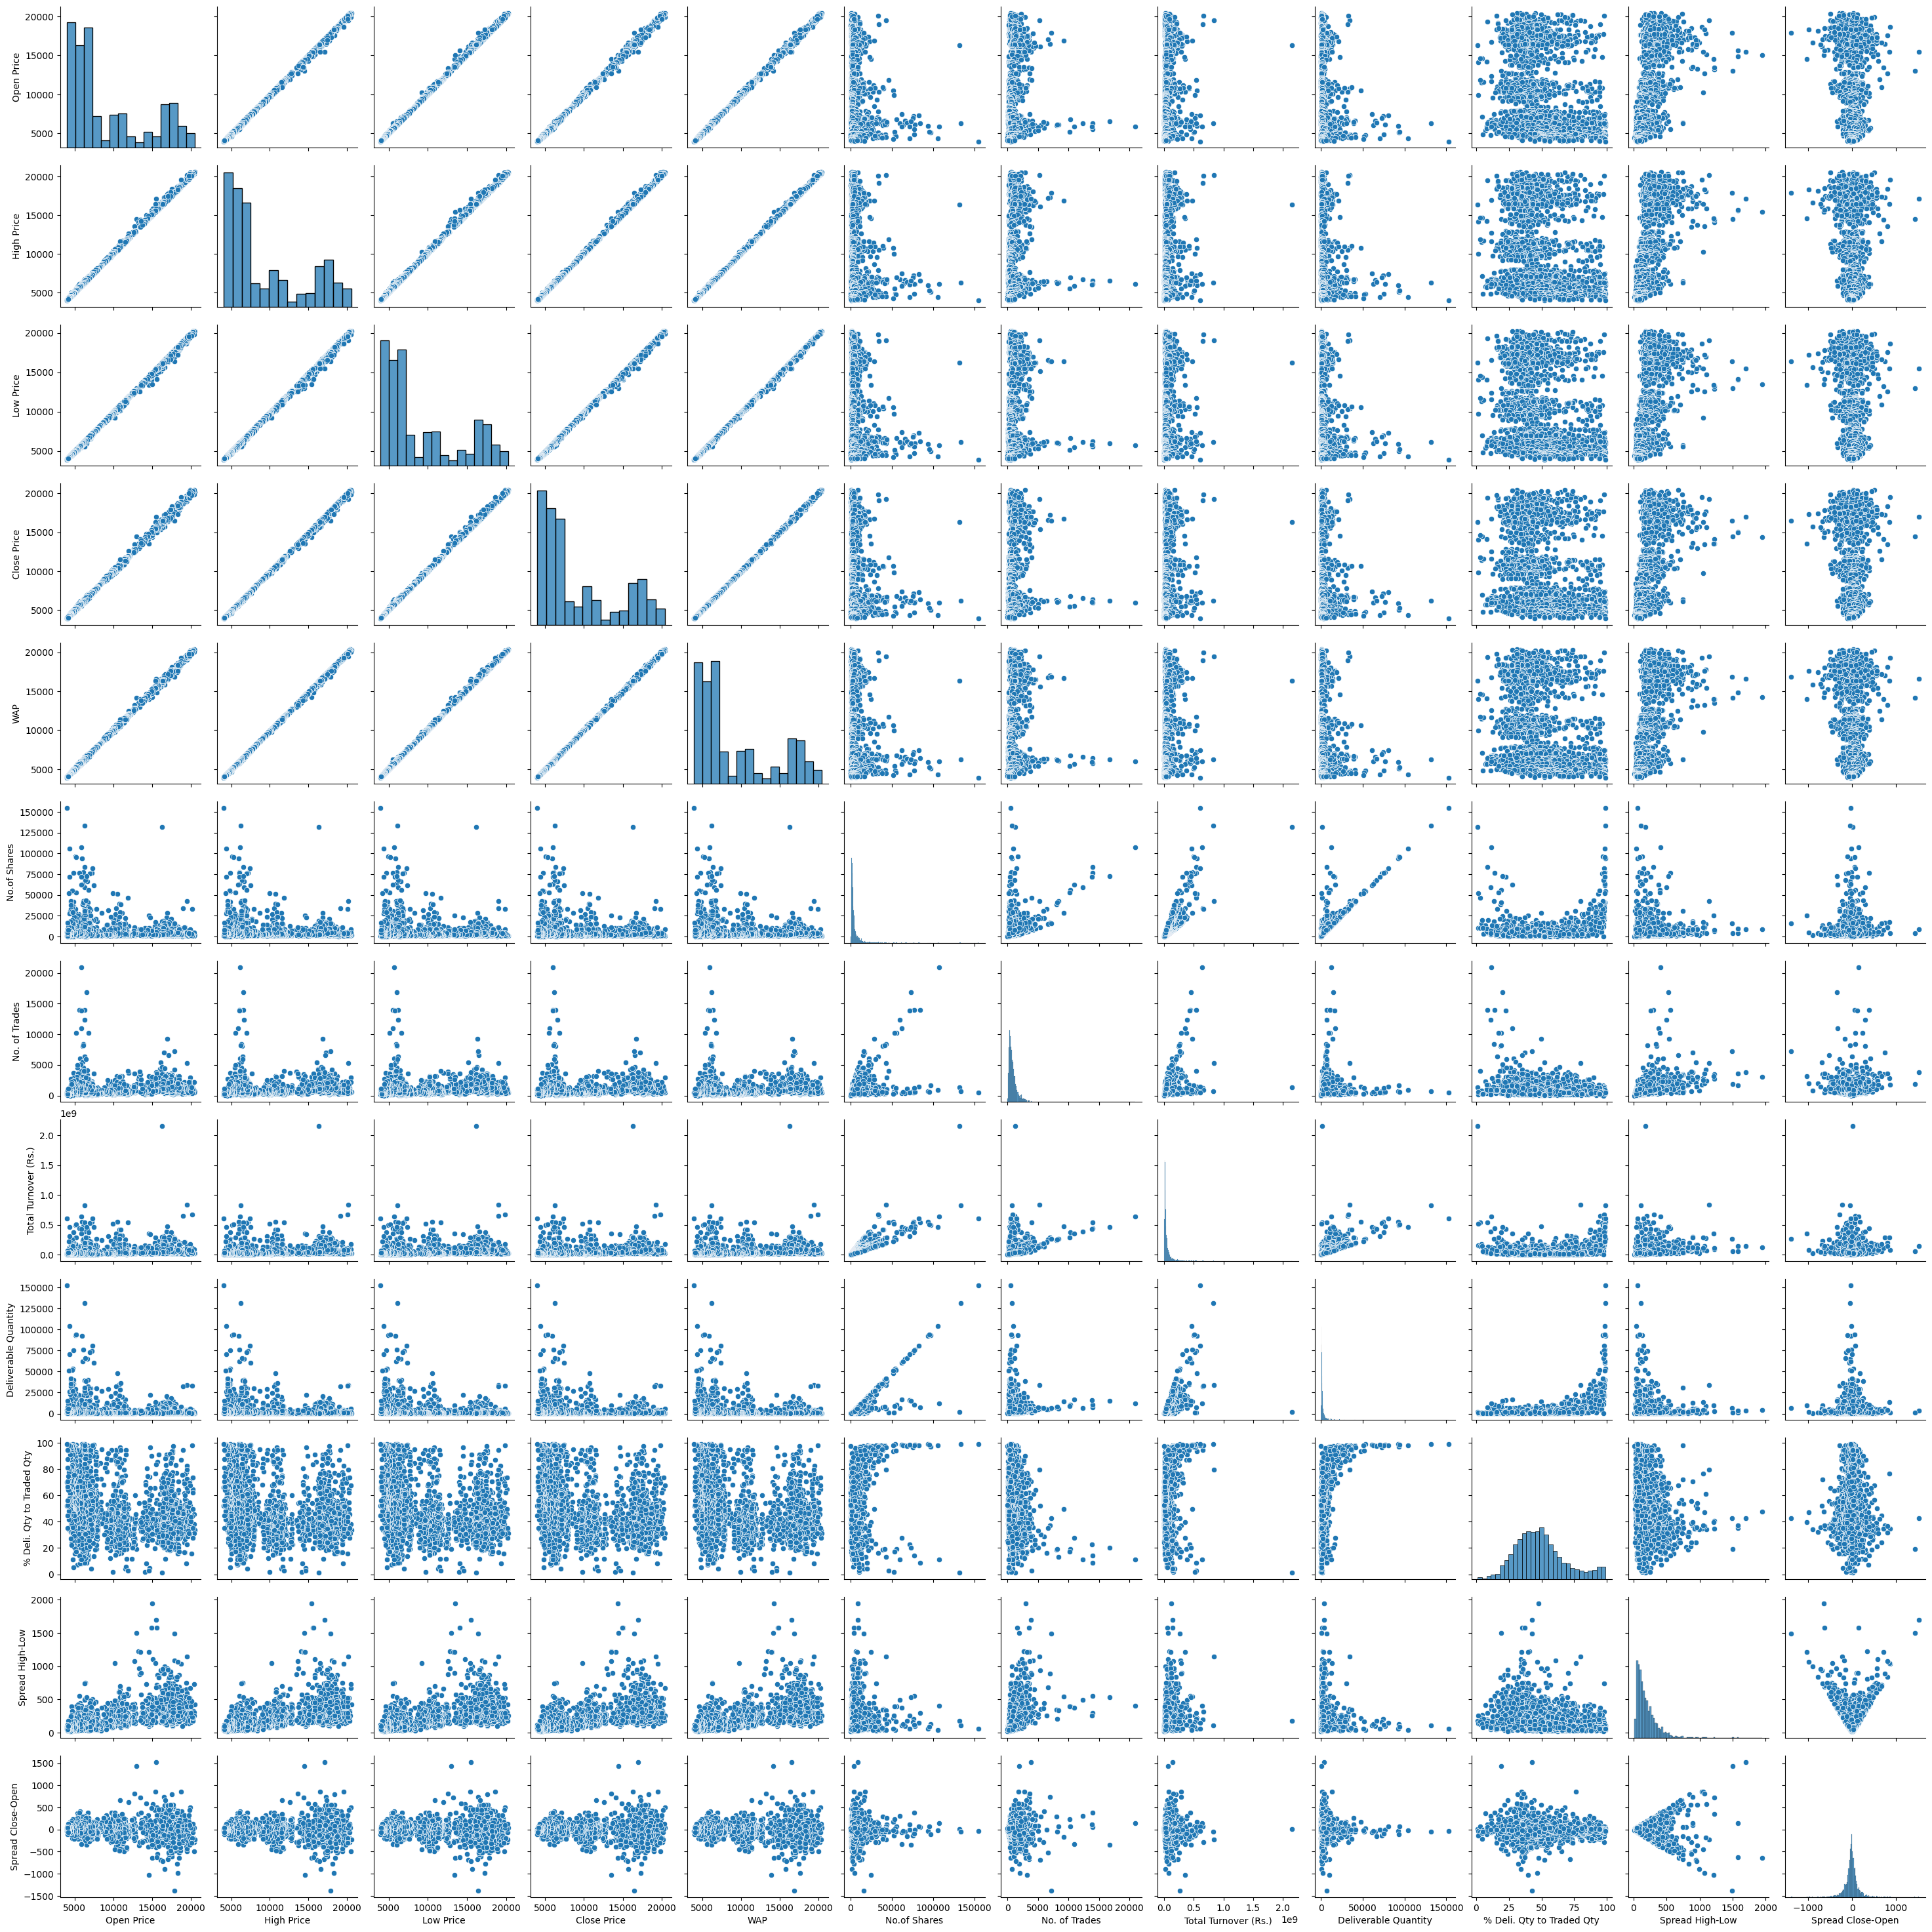

In [62]:
sns.pairplot(data=df)

**Handling missing values**

In [63]:
df.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

since there is only two missing values we can ignore them

**Handling outliers**

<Axes: xlabel='Open Price'>

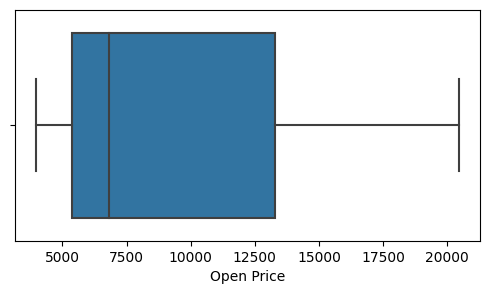

In [64]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Open Price',data=df,orient='h')

<Axes: xlabel='High Price'>

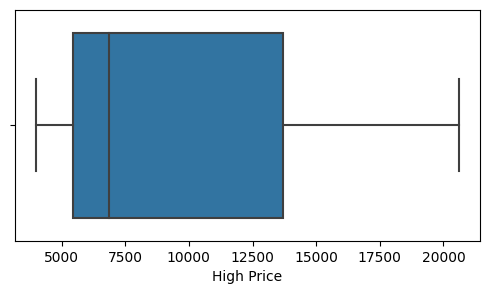

In [65]:
plt.figure(figsize=(6,3))
sns.boxplot(x='High Price',data=df,orient='h')

<Axes: xlabel='Low Price'>

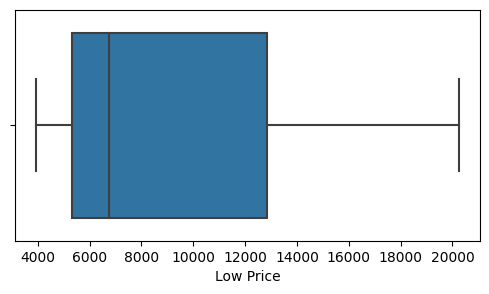

In [66]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Low Price',data=df,orient='h')

<Axes: xlabel='Close Price'>

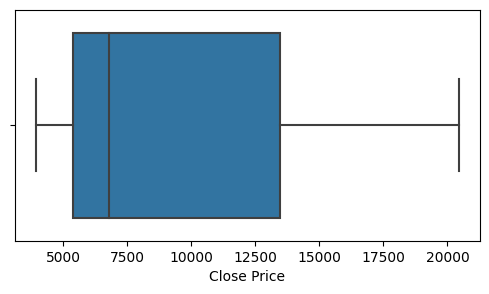

In [67]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Close Price',data=df,orient='h')

<Axes: xlabel='WAP'>

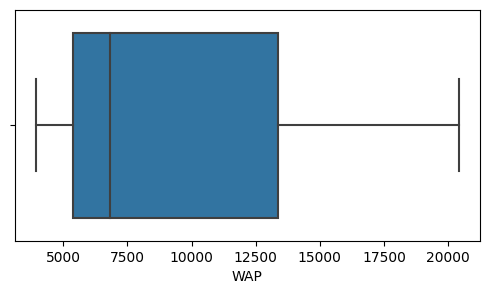

In [68]:
plt.figure(figsize=(6,3))
sns.boxplot(x='WAP',data=df,orient='h')

In [69]:
df.drop(['No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open',"Date"],axis=1,inplace=True)

In [70]:
X=df.drop(['Close Price'],axis=1)
y=df['Close Price']

**Scaling**

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [74]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
y_pred

array([10128.36359426,  7004.81280595,  6867.4412048 ,  5335.27903014,
        6640.31618992,  4593.08769778, 18405.39634381, 18277.19125172,
       14334.59850366,  7111.39939509,  6139.62558841, 17602.69795901,
        9057.16503486,  6673.06376641,  6200.41808667, 11283.22909599,
        4707.153739  ,  6482.87664599, 17369.80629402, 16734.40761843,
        6968.58636172,  5594.38862357, 16328.01552812,  7428.66410094,
       10783.46584494,  9854.457277  ,  6274.30480764, 18114.92538922,
        5981.13589882, 16252.58759287,  9591.56555459, 18352.64938833,
        6319.08492833, 10106.69669665, 19087.52433617,  5278.77604176,
       13723.75776699,  7964.82427937, 17455.7645392 ,  4950.65684035,
        6751.51730484,  5319.62683224,  5124.28295881,  4477.1965927 ,
       14702.54346764, 16763.92317044, 16278.24641398,  4885.18484009,
        5982.62691451, 11009.49101552,  4912.79520231, 14166.04495761,
       19161.57936343,  5225.37183338,  5287.20577878,  4638.01997675,
      

In [76]:
y_test.values

array([10059.05,  7022.95,  6859.05,  5353.15,  6618.5 ,  4590.95,
       18343.9 , 18329.9 , 14289.8 ,  7109.1 ,  6157.9 , 17580.15,
        8986.45,  6719.25,  6235.1 , 11181.95,  4699.55,  6488.35,
       17286.1 , 16602.45,  6959.05,  5614.45, 16386.1 ,  7378.  ,
       10808.4 ,  9838.7 ,  6140.4 , 18164.15,  5976.1 , 16153.65,
        9564.2 , 18422.7 ,  6327.45, 10122.1 , 19164.  ,  5289.3 ,
       13741.85,  7950.85, 17491.95,  4938.1 ,  6771.9 ,  5285.  ,
        5199.6 ,  4482.25, 14838.3 , 16899.35, 16231.45,  4884.4 ,
        5994.5 , 10972.55,  4891.75, 14169.6 , 19184.35,  5241.8 ,
        5235.5 ,  4649.65, 14677.2 ,  6063.4 ,  4765.55, 14297.2 ,
       12849.95, 10677.  ,  4617.25, 17068.7 ,  7069.  ,  4683.1 ,
        4740.65, 17097.8 , 11048.85,  5198.55,  5171.  ,  6048.15,
        6605.95,  5812.  ,  6369.45,  5043.2 , 16066.35,  5085.55,
       16671.65,  4728.4 ,  5602.4 ,  6533.4 ,  6117.  ,  6044.5 ,
       19425.35,  5158.15,  5175.9 , 12699.45,  6037.05,  4496

**Compare actual value with predicted value**

In [78]:
lr_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
lr_df

,Actual Value,Predicted Value
891,10059.05,10128.363594
1145,7022.95,7004.812806
1176,6859.05,6867.441205
1502,5353.15,5335.279030
1194,6618.50,6640.316190
...,...,...
301,17096.95,17114.321725
1559,5786.15,5808.713902
2121,5000.35,5026.418092
1436,6507.40,6499.919253


**Performance Measure**

In [79]:
from sklearn.metrics import r2_score,mean_squared_error
print("R score =",r2_score(y_test,y_pred))
print("MSE = ",mean_squared_error(y_test,y_pred))

R score = 0.9998930347648646
MSE =  2498.235360511992
